In [1]:
import random
import pandas as pd
import seaborn as sns
# import tmap as tm
# from faerun import Faerun
# from mhfp.encoder import MHFPEncoder
from tqdm import tqdm
tqdm.pandas()
from rdkit.Chem import AllChem as Chem
import matplotlib.pyplot as plt
import massspecgym.utils as utils
%reload_ext autoreload
%autoreload 2

In [8]:
df = pd.read_csv('../../data/MassSpecGym_with_test/MassSpecGym_with_test.tsv', sep="\t")
df = df.set_index("identifier")
df['mzs'] = df['mzs'].apply(utils.parse_spec_array)
df['intensities'] = df['intensities'].apply(utils.parse_spec_array)
df

,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,precursor_mz,adduct,instrument_type,collision_energy,fold,simulation_challenge
identifier,,,,,,,,,,,,,
MassSpecGymID0000001,"[91.0542, 125.0233, 154.0499, 155.0577, 185.09...","[0.24524524524524524, 1.0, 0.08008008008008008...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True
MassSpecGymID0000002,"[91.0542, 125.0233, 155.0577, 185.0961, 229.08...","[0.0990990990990991, 0.28128128128128127, 0.04...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,20.0,train,True
MassSpecGymID0000003,"[69.0343, 91.0542, 125.0233, 127.039, 153.0699...","[0.03403403403403404, 0.31431431431431434, 1.0...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,40.0,train,True
MassSpecGymID0000004,"[69.0343, 91.0542, 110.06, 111.0441, 112.0393,...","[0.17917917917917917, 0.47347347347347346, 0.0...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,55.0,train,True
MassSpecGymID0000005,"[91.0542, 125.0233, 185.0961, 229.0859, 246.11...","[0.07807807807807808, 0.1841841841841842, 0.03...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,10.0,train,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MassSpecGymID0414168,"[55.054474, 58.029369, 58.065601, 59.049339, 6...","[0.0004935684823754727, 0.00012405427491363124...",CC[C@@H]1[C@H](/C=C(/C=C\C(=O)[C@@H](C[C@@H]([...,WBPYTXDJUQJLPQ,C46H77NO17,C46H78NO17,915.521724,916.5290,[M+H]+,QTOF,NaN,val,False
MassSpecGymID0414171,"[72.043739, 86.060242, 98.058304, 99.0634, 126...","[0.0019527744563354998, 0.0016939927337585416,...",C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...,DHPRQBPJLMKORJ,C22H23ClN2O8,C22H24ClN2O8,478.115724,479.1230,[M+H]+,QTOF,NaN,test,False
MassSpecGymID0414172,"[72.080132, 102.233917, 113.082344, 113.121498...","[0.021173783463613503, 0.007516001055215398, 0...",C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...,CEAZRRDELHUEMR,C21H43N5O7,C21H44N5O7,477.317724,478.3250,[M+H]+,QTOF,NaN,val,False


### Metadata

In [9]:
df['instrument_type']= df['instrument_type'].apply(lambda x: 'Orbitrap' if x in ['QFT', 'ITFT'] else x)
print(df['instrument_type'].value_counts())
df = df.rename(columns={
    'instrument_type': 'Instrument type',
    'collision_energy': 'Collision energy [eV]',
    'adduct': 'Ionization adduct',
    'precursor_mz': 'Precursor m/z',
})

instrument_type
Orbitrap    172058
QTOF         53823
Name: count, dtype: int64


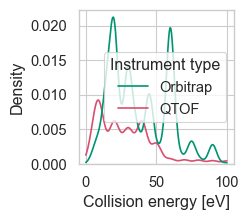

In [12]:
utils.init_plotting(figsize=(2, 2), font_scale=1.2)
ax = sns.kdeplot(x=df['Collision energy [eV]'], hue=df['Instrument type'], clip=(0, 100))
sns.move_legend(ax, "center right")
plt.savefig('energies_kde.svg')
plt.show()

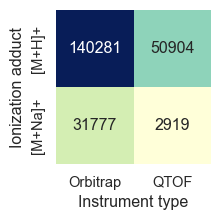

In [13]:
utils.init_plotting(figsize=(2, 2), font_scale=1.2)
pivot_table = df.pivot_table(columns='Instrument type', index='Ionization adduct', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Count'}, cbar=False)
plt.savefig('adducts_heatmap.svg')
plt.show()

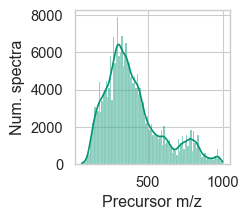

In [14]:
utils.init_plotting(figsize=(2, 2), font_scale=1.2)
sns.histplot(df['Precursor m/z'], bins=100, kde=True)
plt.ylabel('Num. spectra')
plt.savefig('prec_mzs_kde.svg')
plt.show()

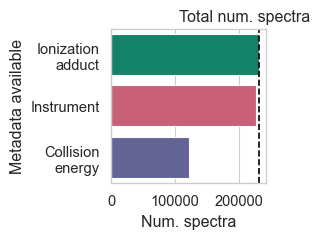

In [15]:
utils.init_plotting(figsize=(2, 2), font_scale=1.2)
sns.barplot(
    x=[len(df['Ionization adduct'].dropna()), len(df['Instrument type'].dropna()), len(df['Collision energy [eV]'].dropna())],
    y=['Ionization\nadduct', 'Instrument', 'Collision\nenergy'],
    hue=['Ionization\nadduct', 'Instrument', 'Collision\nenergy']
)
plt.axvline(x=len(df), color='black', linestyle='--')
plt.xlabel('Num. spectra')
plt.ylabel('Metadata available')
plt.text(len(df) - 125_000, -0.65, f'Total num. spectra')
plt.savefig('metadata_bars.svg')
plt.show()

### Chemical classes of molecules

In [18]:
df_classes = pd.read_csv('../../data/data/auxiliary/MassSpecGym_classyfire_all.tsv', sep='\t', usecols=range(5), names=['inchi', 'class1', 'class2', 'class3', 'class4'])
print(len(df_classes))
display(df_classes.nunique())
df_classes = df_classes.set_index('inchi')

27605


inchi     27605
class1      179
class2      228
class3      304
class4      370
dtype: int64

In [19]:
df_mols = df.drop_duplicates('inchikey')
df_mols['chemical_class'] = df_mols['inchikey'].map(df_classes['class3'])
df_mols

/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_6529/1841353018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['chemical_class'] = df_mols['inchikey'].map(df_classes['class3'])


,mzs,intensities,smiles,inchikey,formula,precursor_formula,parent_mass,Precursor m/z,Ionization adduct,Instrument type,Collision energy [eV],fold,simulation_challenge,chemical_class
identifier,,,,,,,,,,,,,,
MassSpecGymID0000001,"[91.0542, 125.0233, 154.0499, 155.0577, 185.09...","[0.24524524524524524, 1.0, 0.08008008008008008...",CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,VFMQMACUYWGDOJ,C16H17NO4,C16H18NO4,287.115224,288.1225,[M+H]+,Orbitrap,30.0,train,True,Lactones
MassSpecGymID0000012,"[55.0185, 67.0542, 68.9971, 69.0699, 71.0491, ...","[0.11411411411411411, 0.07607607607607608, 0.0...",C[C@H]1CCCC(=O)CCC/C=C/C2=C(C(=CC(=C2)O)O)C(=O)O1,MBMQEIFVQACCCH,C18H22O5,C18H23O5,318.146224,319.1535,[M+H]+,Orbitrap,50.0,train,True,Lactones
MassSpecGymID0000052,"[109.0634, 192.0642]","[0.043043043043043044, 1.0]",CC(C)(C=C)C1(C2=CC=CC=C2N(C1=O)O)CC3C(=O)N/C(=...,GIYROBMIPLLHQE,C22H23N5O4,C22H24N5O4,421.174424,422.1817,[M+H]+,Orbitrap,40.0,train,True,"Amino acids, peptides, and analogues"
MassSpecGymID0000061,"[85.0284, 137.0597, 155.0703, 197.0808]","[0.05405405405405406, 0.05405405405405406, 1.0...",C[C@@H]1C[C@H]2[C@H](O2)/C=C\C(=O)CC(=O)O1,MXRJZFNJVFPSQN,C10H12O4,C10H13O4,196.073024,197.0803,[M+H]+,Orbitrap,10.0,train,True,Organoheterocyclic compounds
MassSpecGymID0000069,"[245.0444, 253.0495, 271.0601, 285.0757, 287.0...","[0.4924924924924925, 0.056056056056056056, 0.3...",CC12CC3=C(C(O1)C[C@@H](O2)C(=O)O)C(=C4C(=O)C=C...,HNMWDXUKPJZOQD,C18H16O9,C18H17O9,376.078824,377.0861,[M+H]+,Orbitrap,20.0,train,True,Organoheterocyclic compounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MassSpecGymID0414136,"[120.041023, 120.045662, 136.04686, 136.050156...","[0.060218978102189784, 0.07937956204379562, 0....",C1C(=NC2=C(N1)N=C(NC2=O)N)CNC3=CC=C(C=C3)C(=O)...,OZRNSSUDZOLUSN,C19H21N7O6,C19H22N7O6,443.155724,444.1630,[M+H]+,QTOF,NaN,train,False,"Amino acids, peptides, and analogues"
MassSpecGymID0414138,"[51.02533, 51.02734, 51.029362, 51.032391, 55....","[0.38415841584158417, 0.36435643564356435, 0.2...",C1=CC=C(C(=C1)CCC(=O)O)O,CJBDUOMQLFKVQC,C9H10O3,C9H11O3,166.063724,167.0710,[M+H]+,QTOF,NaN,train,False,Phenylpropanoids and polyketides
MassSpecGymID0414147,"[95.0, 96.0, 121.0, 135.0, 163.0, 181.0]","[0.28, 0.11, 0.07, 0.17, 0.15, 1.0]",CN1C=NC=C1C[C@@H]2CC(=O)OC2,YOIFSTUAGLOWPB,C9H12N2O2,C9H13N2O2,180.086724,181.0940,[M+H]+,QTOF,NaN,train,False,Organoheterocyclic compounds


In [20]:
df_mols['chemical_class'].nunique()

304

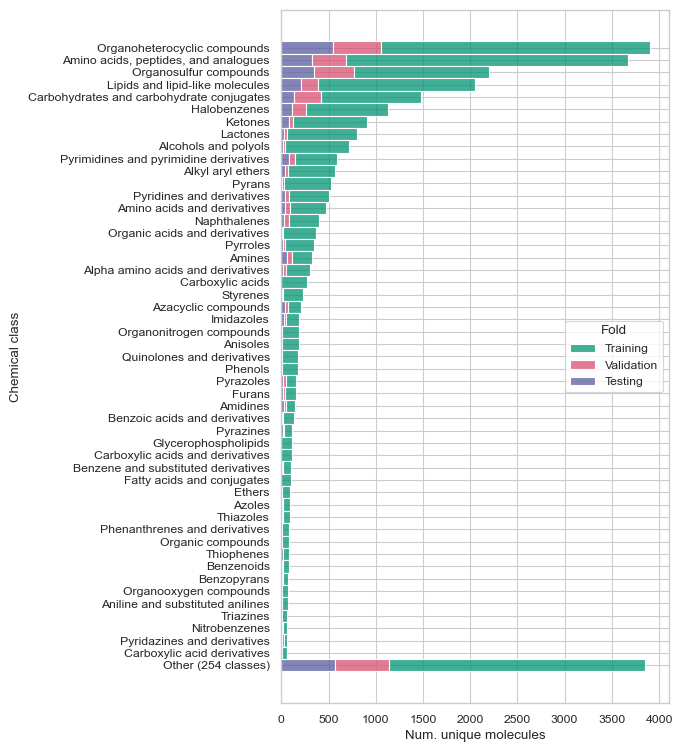

In [112]:
utils.init_plotting(figsize=(5, 9))
cls_vc = df_mols['chemical_class'].value_counts()
top50cls = cls_vc.head(50).index
df_mols_top50cls = df_mols.copy()
df_mols_top50cls.loc[~df_mols_top50cls['chemical_class'].isin(top50cls), 'chemical_class'] = f'Other ({df_mols["chemical_class"].nunique() - 50} classes)'
df_mols_top50cls = df_mols_top50cls.sort_values('chemical_class', key=lambda x: -x.map(cls_vc))
df_mols_top50cls['fold'] = df_mols_top50cls['fold'].replace({'train': 'Training', 'val': 'Validation', 'test': 'Testing'})
df_mols_top50cls = df_mols_top50cls.rename(columns={'fold': 'Fold', 'chemical_class': 'Chemical class'})
sns.histplot(data=df_mols_top50cls, y='Chemical class', hue='Fold', multiple='stack', shrink=1)
plt.xlabel('Num. unique molecules')
plt.savefig('chem_classes_hist.svg')
plt.show()

In [84]:
df_cls_folds = df_mols.groupby(['chemical_class', 'fold'])['inchikey'].count().sort_values(ascending=False)
df_cls_folds = df_cls_folds.unstack().fillna(0).astype(int)[['train', 'val', 'test']].sort_values('train', ascending=False)
df_cls_folds

fold,train,val,test
chemical_class,,,
"Amino acids, peptides, and analogues",2984,364,321
Organoheterocyclic compounds,2851,505,552
Lipids and lipid-like molecules,1663,174,210
Organosulfur compounds,1437,422,344
Carbohydrates and carbohydrate conjugates,1065,280,135
...,...,...,...
Anthraquinones,0,1,0
7-hydroxycoumarins,0,0,1
2-halobenzoic acids and derivatives,0,1,0


In [88]:
folds = ['train', 'val', 'test']
for f in folds:
    print('---', f, '---')
    folds_other = [x for x in folds if x != f]
    df_only_f = df_cls_folds[(df_cls_folds[folds_other[0]] == 0) & (df_cls_folds[folds_other[1]] == 0)]
    print('Num. exclusive classes:', len(df_only_f))
    print('Num. exclusive molecules', df_only_f[f].sum())

--- train ---
Num. exclusive classes: 124
Num. exclusive molecules 1112
--- val ---
Num. exclusive classes: 9
Num. exclusive molecules 10
--- test ---
Num. exclusive classes: 10
Num. exclusive molecules 12


### TMAP

In [10]:
fp_size = 2048
enc = MHFPEncoder(fp_size)
df_mols['mhfp'] = df_mols['smiles'].progress_apply(lambda s: tm.VectorUint(enc.encode_mol(Chem.MolFromSmiles(s))))
df_mols['mhfp']

100%|██████████| 28929/28929 [04:23<00:00, 109.70it/s]
/tmp/ipykernel_442654/2976327974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['mhfp'] = df_mols['smiles'].progress_apply(lambda s: tm.VectorUint(enc.encode_mol(Chem.MolFromSmiles(s))))


0         [149873304, 167050623, 122868856, 109021789, 5...
11        [54297102, 36123943, 78177578, 173301519, 1680...
42        [5225406, 96495921, 51965165, 35377053, 121199...
51        [108862666, 50015874, 118133710, 76375303, 664...
59        [54297102, 13454827, 105751502, 38795470, 1680...
                                ...                        
231083    [179620309, 33988699, 66366750, 82611468, 5339...
231084    [54297102, 36123943, 367406790, 82611468, 1680...
231085    [19469312, 52104900, 145399841, 70898887, 1587...
231086    [5957539, 6028326, 63689098, 113947674, 264749...
231087    [5957539, 6028326, 63689098, 65607474, 2647491...
Name: mhfp, Length: 28929, dtype: object

In [35]:
l = 128
lf = tm.LSHForest(fp_size, 128)
lf.batch_add(df_mols['mhfp'].tolist())
lf.index()

cfg = tm.LayoutConfiguration()
cfg.node_size = 1 / 37
x, y, s, t, _ = tm.layout_from_lsh_forest(lf, cfg)
df_mols['x'] = x
df_mols['y'] = y

/tmp/ipykernel_442654/1177400570.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['x'] = x
/tmp/ipykernel_442654/1177400570.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['y'] = y


In [29]:
k = 13
topk_classes = df_mols['chemical_class'].value_counts()[:k]
df_mols['chemical_class_topk'] = df_mols['chemical_class'].apply(
    lambda c: c if c in topk_classes.index else f'Other ({df_mols["chemical_class"].nunique() - k} classes)'
)
df_mols['chemical_class_topk'].value_counts()

/tmp/ipykernel_442654/1661677651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mols['chemical_class_topk'] = df_mols['chemical_class'].apply(


Other (292 classes)                          10386
Organoheterocyclic compounds                  3908
Amino acids, peptides, and analogues          3669
Organosulfur compounds                        2203
Lipids and lipid-like molecules               2047
Carbohydrates and carbohydrate conjugates     1480
Halobenzenes                                  1129
Ketones                                        907
Lactones                                       799
Alcohols and polyols                           712
Pyrimidines and pyrimidine derivatives         593
Alkyl aryl ethers                              572
Pyrans                                         524
Name: chemical_class_topk, dtype: int64

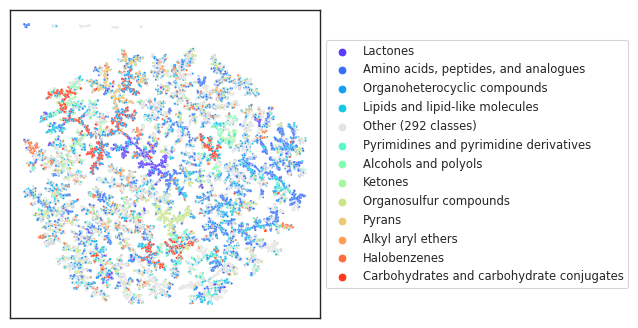

In [36]:
utils.init_plotting(figsize=(4, 4), style='white')

unique_classes = df_mols['chemical_class_topk'].unique()
non_other_classes = [c for c in unique_classes if c != 'Other']
colors = sns.color_palette('rainbow', len(non_other_classes))
custom_palette = {category: color for category, color in zip(non_other_classes, colors)}
custom_palette['Other (292 classes)'] = '#E5E4E2'

import matplotlib as mpl

plt.xticks([])
plt.yticks([])

sns.scatterplot(data=df_mols, x='x', y='y', s=2, hue='chemical_class_topk', palette=custom_palette)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('')
plt.ylabel('')

plt.savefig('mols_tmap.png', dpi=500, bbox_inches='tight')
plt.show()